In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TWA_Design_Tools import TWA_Design_Toolkit

In [2]:
# Enter the physical parameters of the antenna 
num_straps = 11
f0 = 96e6
w0 = 2*np.pi*f0
clight = 3e8
Rant = 1.12 # m, hfs of d3d

# See code logbook "my antenna" section. This is for shot 147634. 
n_par = -5 
k_par = w0*n_par/clight
print(f'k_par : {k_par} 1/m')
n_phi = Rant*k_par
print(f'n_phi: {n_phi}')

myTWA = TWA_Design_Toolkit(num_straps=num_straps, f0=f0, k_par_max=k_par)
myTWA.print_key_params()
myTWA.set_center_fed(False)
# set my antenna width to 50% of the distance between straps 
# myTWA.set_strap_width(w=10e-2) TODO: this has been updated 
myTWA.set_strap_width(w=8e-2)
print(f'Strap width: {myTWA.wstr*100} cm')

k_par : -10.053096491487338 1/m
n_phi: -11.25946807046582
You are at resonance, so delta_phi = pi/2. Solving for d given k_par:


----------------Parameter--Box-------------------
Distance between strap centers d = 0.15625 m
The first null will be at 3.655671451449941 m^-1
delta_phi = -0.5 pi
Strap length should be less than lambda/4 = 0.7807095260416667 m
--------------END--Parameter--Box----------------


The antenna length is 1.6425 m long
Strap width: 8.0 cm


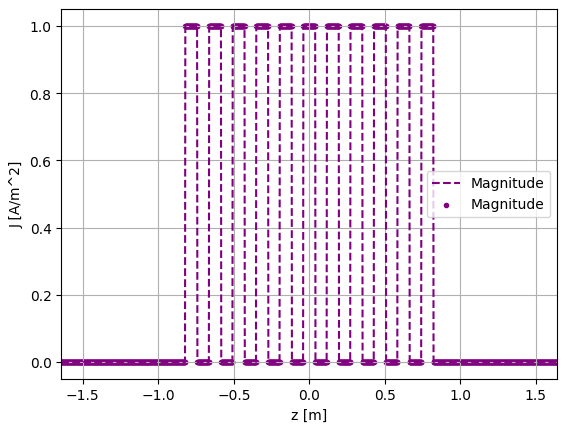

In [3]:
zrange = 100
num_points = int(1e5) # number of grid points for the z grid
zlim = 2*(num_straps*myTWA.wstr + (num_straps-1)*(myTWA.d - myTWA.wstr))/2
plt.xlim(-zlim, zlim)
myTWA.plot_J_of_z(J0=1, zmin=-zrange, zmax=zrange, num_points=num_points)

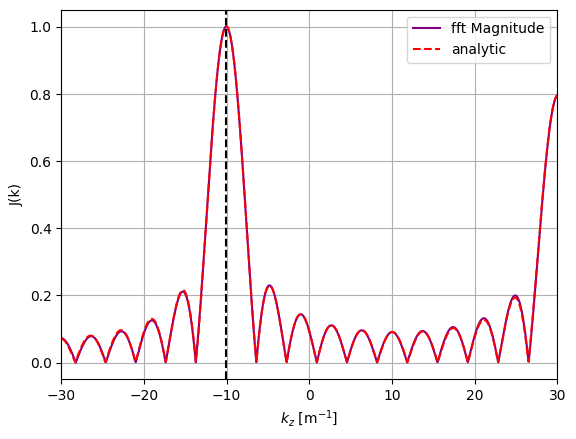

In [4]:
myTWA.plot_J_k_versus_k(zmin=-zrange, zmax=zrange, kplotmin=-30, kplotmax=30, num_pointsz=num_points, num_pointsk=1000, J0=1)

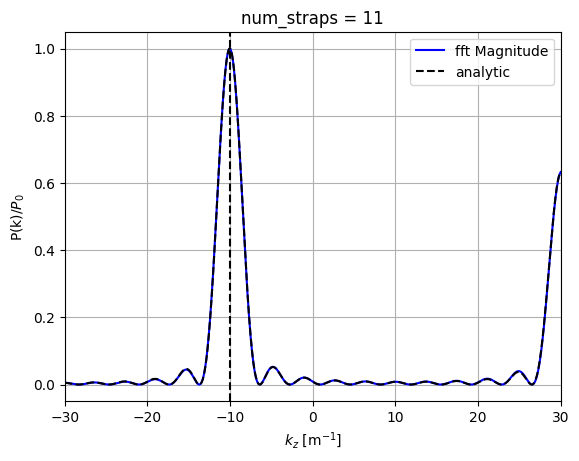

In [5]:
plt.title(f'num_straps = {num_straps}')
myTWA.plot_normalized_power_versus_k(zmin=-zrange, zmax=zrange, kplotmin=-30, kplotmax=30, num_pointsz=num_points, num_pointsk=1000, J0=1)

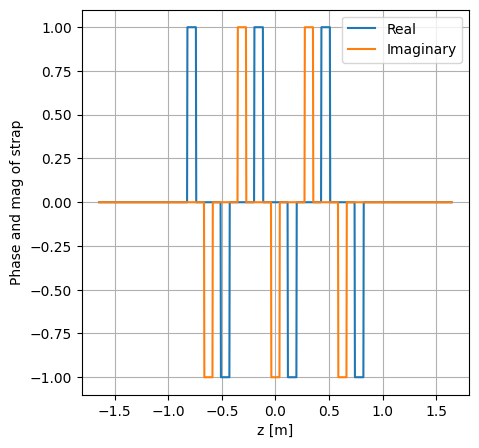

In [6]:
zarray = np.linspace(-zlim, zlim, 1000)
Jarray = np.zeros_like(zarray, dtype='complex')

for i in range(zarray.shape[0]):
    Jarray[i] = myTWA.get_J_z(1, zarray[i])

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.plot(zarray, np.real(Jarray), label='Real')
ax.plot(zarray, np.imag(Jarray), label='Imaginary')
ax.grid()
ax.set_xlabel('z [m]')
ax.set_ylabel('Phase and mag of strap')
ax.legend()

In [7]:
# New area to begin work on the Ricardo inspired antenna 

dout = myTWA.wstr*0.8
Z0_target = 30 # 30 Ohm cable
factor = 2*np.pi*Z0_target*np.sqrt(myTWA.epsi0/myTWA.mu0)
din = dout*np.exp(-factor)
print(f'dout: {dout} m')
print(f'din: {din} m')
print(f'Z0: {myTWA.get_coax_Z0(dout, din)} Ohms')
# set up some other dimensions for the model 
ar = 1.5e-2
s = myTWA.d
d = 11e-2
s0 = 16e-2
w = myTWA.wstr
l = 15e-2
ts = 0.5e-2
tbox = 1e-2
h = .5e-2
t_cap_extend = 0.25e-2
wcap = w + 2*t_cap_extend # 1 cm on either side
wcapbox = wcap + 2*h
tdiv = s - 2*h - wcap 
dcap = ts + 2*t_cap_extend
dcapbox = dcap + 2*h
lcapbox = 10e-2
lcut = 6e-2
ldeembed = 5e-2
lfeed = 10e-2
if l - lfeed < dout/2:
    raise ValueError('reduce lfeed until l - lfeed > dout/2')

print(f'ar:   {ar*100} cm')
print(f's:    {s*100} cm')
print(f'd:    {d*100} cm')
print(f's0:   {s0*100} cm')
print(f'w:    {w*100} cm')
print(f'l:    {l*100} cm')
print(f'ts:   {ts*100} cm')
print(f'tbox: {tbox*100} cm')
print(f'h:    {h*100} cm')
print(f'wcap: {wcap*100} cm')
print(f't_cap_extend:  {t_cap_extend*100} cm')
print(f'wcapbox:  {wcapbox*100} cm')
print(f'tdiv:     {tdiv*100} cm')
print(f'dcap:     {dcap*100} cm')
print(f'dcapbox:  {dcapbox*100} cm')
print(f'lcapbox:  {lcapbox*100} cm')
print(f'lcut:     {lcut*100} cm')
print(f'ldeembed: {ldeembed*100} cm')
print(f'lfeed: {lfeed*100} cm')
print(f'l - lfeed: {(l-lfeed)*100}, and dout/2: {dout*100/2} cm')
print(f'ar - ts/2 - t_cap_extend - h- tbox: {(ar - ts/2 - t_cap_extend - h - tbox)*100} cm')

dout: 0.064 m
din: 0.03880473391614521 m
Z0: 30.000000000000007 Ohms
ar:   1.5 cm
s:    15.625 cm
d:    11.0 cm
s0:   16.0 cm
w:    8.0 cm
l:    15.0 cm
ts:   0.5 cm
tbox: 1.0 cm
h:    0.5 cm
wcap: 8.5 cm
t_cap_extend:  0.25 cm
wcapbox:  9.5 cm
tdiv:     6.124999999999998 cm
dcap:     1.0 cm
dcapbox:  2.0 cm
lcapbox:  10.0 cm
lcut:     6.0 cm
ldeembed: 5.0 cm
lfeed: 10.0 cm
l - lfeed: 4.999999999999999, and dout/2: 3.2 cm
ar - ts/2 - t_cap_extend - h- tbox: -0.5000000000000002 cm


In [8]:
# begin playing with the RF python package
import skrf as rf

The port characteristic impedence is Z0 = 83.12100040448948
C0 =  1.930277838777685  pF
w: 0.08
h: 0.01
h2: 0.0025
A: 0.0005450298844527009 m^2
l: 0.006812873555658761
d: 0.15625
C0check 1.9302778387776856  pF
Cno_cap:  0.70832 pF
Ch2:  2.83328 pF
Cadd_check:  1.930277838777685 pF


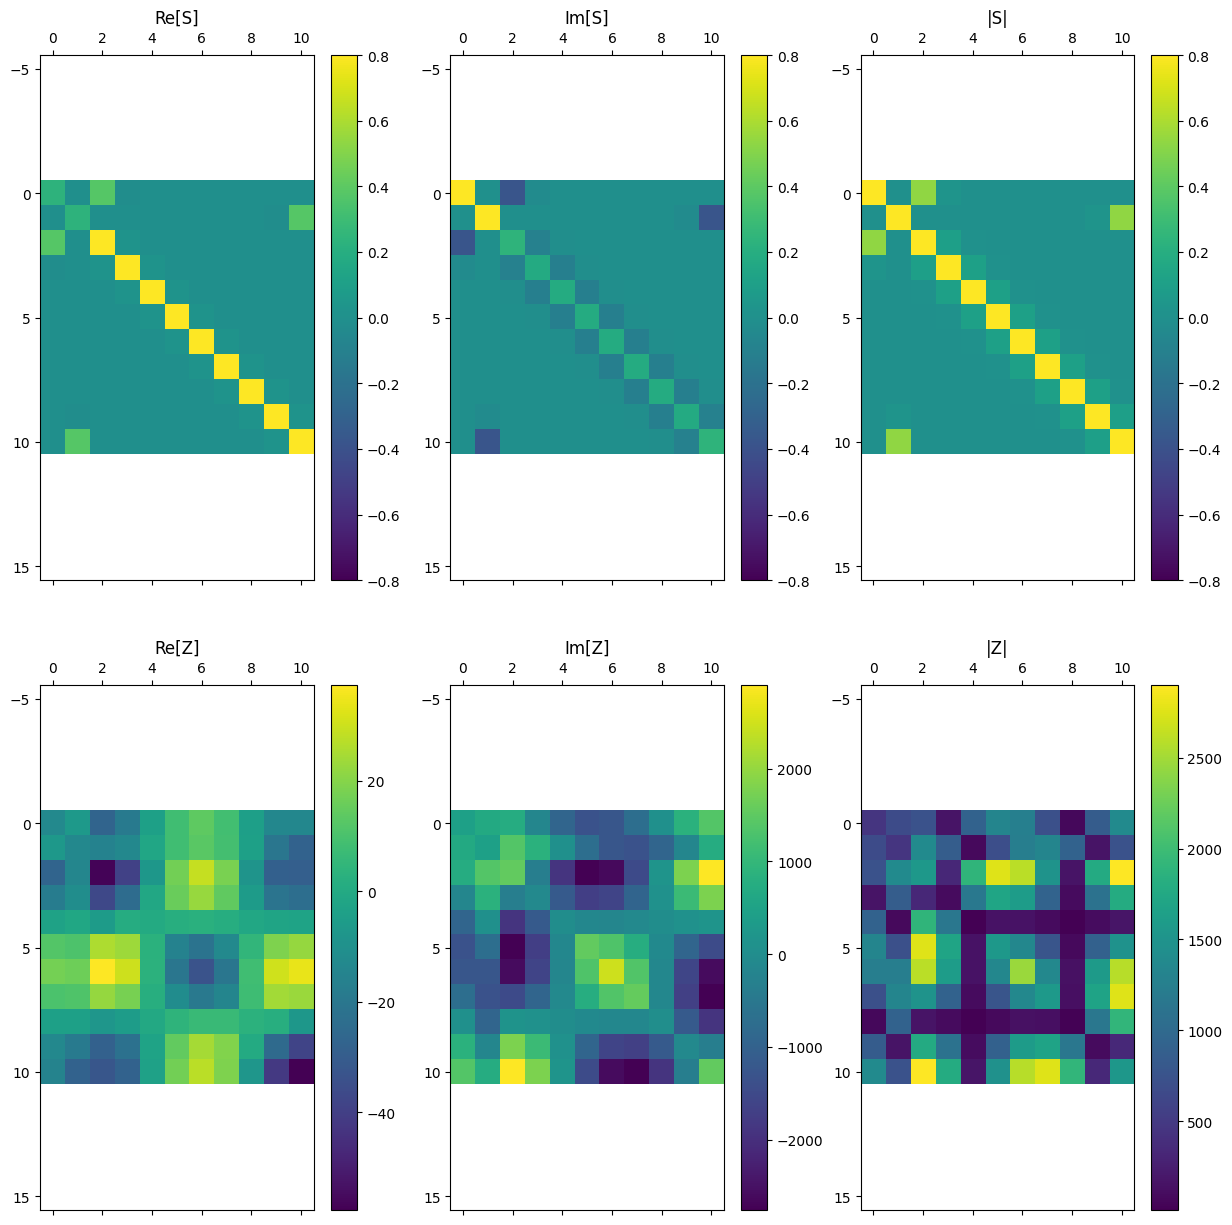

In [9]:
## S and Z matrix Section 
Smatrix_file_name = 'circ_model/Smat_ant_96.csv'
Smat = myTWA.read_Smat_from_comsol_portscan_Stable(filename=Smatrix_file_name, return_flag=True)
#print(Smat[1,:])
# Z0 = myTWA.get_coax_Z0(d_outer=0.016, d_inner=0.004)
Z0 = myTWA.get_coax_Z0(d_outer=0.008, d_inner=0.002)
myTWA.get_Z_matrix(Z0_port=Z0)
print(f'The port characteristic impedence is Z0 = {Z0}')
print('C0 = ', myTWA.calculate_C0()/1e-12, ' pF')


ts = 1e-2 #2e-2 # m TODO: updated this 
h = .01
h2 = h/4
w = myTWA.wstr
print(f'w: {w}')
print(f'h: {h}')
print(f'h2: {h2}')
A = myTWA.cap_area_given_gap(h2)
l = A/w
print(f'A: {A} m^2')
print(f'l: {l}')
print(f'd: {myTWA.d}')

Zav = np.trace(np.imag(myTWA.Zmatrix))/num_straps
C0check = 1/(Zav*w0)
print('C0check', C0check*1e12, ' pF')
Cno_cap = myTWA.epsi0*myTWA.wstr*ts/h
print('Cno_cap: ', Cno_cap/1e-12, 'pF')
Ch2 = myTWA.epsi0*myTWA.wstr*ts/h2
print('Ch2: ', Ch2/1e-12, 'pF')
Cadd_check  = myTWA.epsi0*myTWA.wstr*l/h2
print('Cadd_check: ', Cadd_check/1e-12, 'pF')
myTWA.plot_Smat_and_Zmat()

In [91]:
# python function to load up the cap table

import csv
filename = 'circ_model/S11_cap_course.csv'
def get_cap_S_datatable(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)
    headers = data[4]
    data = data[5:]
    fmat_string  = []
    for row in data:
        fmat_string.append(row)
    fmat = np.array([[complex(num.replace('i', 'j')) for num in row] for row in fmat_string], dtype=complex)
    return fmat, headers

def get_cap_S_given_f_and_lcap(filename, f, lcap, round_level=3):
    lcap = np.round(lcap, round_level)
    data, headers = get_cap_S_datatable(filename)
    freqs = np.real(data[:, 0])
    ufreqs = np.unique(freqs)
    num_freq = ufreqs.shape[0]
    lengths = np.round(np.real(data[:,1]), round_level)
    ulengths = np.unique(lengths)
    num_lengths = ulengths.shape[0]
    i_f = np.where(ufreqs == f)[0][0]
    i_length = np.where(ulengths == lcap)[0][0]
    rownum = i_f*num_lengths + i_length
    ffound = np.real(data[rownum, 0])
    lcapfound = np.real(data[rownum,1])
    S11 = data[rownum, 5] # TODO: was 3, now de-embedded
    S11db = np.real(data[rownum, 4])
    Z0_port = np.real(data[rownum, 7])
    VSWR = np.real(data[rownum, 8])
    #print('TODO: should test with a slightly larger dataset')
    return ffound, lcapfound, S11, S11db, Z0_port, VSWR


# function that reads in cap length and returns an RF network object over the frequencies freqs
def build_capnet_given_length(length, freqs, filename, z0, round_level=3):
    S11_array = np.zeros((freqs.shape[0], 1, 1), dtype='complex')
    for i in range(freqs.shape[0]):
        f = freqs[i]
        ffound, lcapfound, S11, S11db, Z0_port, VSWR = get_cap_S_given_f_and_lcap(filename=filename,
                                    f=f, lcap=length, round_level=round_level)
        S11_array[i, 0, 0] = S11


    # create the network object 
    capnet = rf.Network()
    capnet.frequency = rf.Frequency.from_f(freqs, unit='MHz')
    capnet.s = S11_array
    capnet.z0 = z0
    capnet.name = str(lcapfound)
    return capnet

# display the capacitance of the capacitor network produced 
def print_Znorm_and_capacitance(network, f, freqs, toprint=True):
    idx = np.where(freqs == f)
    Zcap = rf.s2z(network.s, z0=9.3506)[idx][0,0,0]
    C = (-np.imag(Zcap)*2*np.pi*f*1e6)**-1
    if toprint:
        print(f'Zcap:{Zcap}, z0: {network.z0[0]}, Zcap/z0: {Zcap/network.z0[0]}')
        print(f'C = {C*1e12} pF')
    return Zcap, C

data, headers = get_cap_S_datatable(filename)
print(headers)
get_cap_S_given_f_and_lcap(filename, 97, .02)

['% f (MHz)', 'lcap (m)', 'freq (MHz)', 'S11 (1)', 'S11 (1)', 'De-embedded S11 (1)', 'TEM port impedance (Ω)', 'TEM mode port characteristic impedance (Ω)', 'Voltage standing wave ratio (1)']


(97.0,
 0.02,
 (0.9981326658831038-0.06109990266372134j),
 8.758878880087036e-06,
 9.339901629606146,
 -1983333.6565902943)

In [11]:
# the antenna S matrix for a given frequency 
def get_ant_S_datatable(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)
    headers = data[4]
    data = data[5:]
    fmat_string  = []
    for row in data:
        fmat_string.append(row)
    fmat = np.array([[complex(num.replace('i', 'j')) for num in row] for row in fmat_string], dtype=complex)
    return fmat, headers

def get_ant_Smat_given_f(filename, f):
    data, headers = get_ant_S_datatable(filename)
    num_ports = data[0,:].shape[0] - 1
    #print(f'num_ports: {num_ports}')
    freqs = np.real(data[:, 0])
    ufreqs = np.unique(freqs)
    num_freqs = ufreqs.shape[0]
    #print(f'ufreqs: {ufreqs}')
    i_f = np.where(ufreqs == f)[0][0]
    #print(f'i_f: {i_f}')
    start_idx = i_f*num_freqs
    print('WARNING: this function only supports 1 frequency. please use class instead')
    Smat = data[start_idx:(start_idx+num_ports), 1:]
    return Smat

# return an skrf network object for the antenna across the range of frequencies freq 
def build_antnet(freqs, filename, z0, name=None):
    smat_test =  get_ant_Smat_given_f(filename, freqs[0])
    numports = smat_test.shape[0]
    smat_versus_freq = np.zeros((freqs.shape[0], numports, numports), dtype='complex') # the (nb_f, N, N) shaped s matrix
    for i in range(freqs.shape[0]):
        smat =  get_ant_Smat_given_f(filename, freqs[i])
        smat_versus_freq[i, :, :] = smat

    # create the network object 
    antnet = rf.Network()
    antnet.frequency = rf.Frequency.from_f(freqs, unit='MHz')
    antnet.s = smat_versus_freq
    antnet.z0 = z0
    antnet.name = str(name)
    return antnet

filename = 'circ_model/Smat_ant_96.csv'
freqs = np.array([96])
z0s = [30, 30] + [9.3506]*9
antnet1 = build_antnet(freqs, filename, z0=z0s, name='test antenna network')
print(antnet1.z0)
# Smat = get_ant_Smat_given_f(filename, 96)
# print(data[0,:].shape[0])
# print(Smat.shape)
# print(Smat[:,0])

[[30.    +0.j 30.    +0.j  9.3506+0.j  9.3506+0.j  9.3506+0.j  9.3506+0.j
   9.3506+0.j  9.3506+0.j  9.3506+0.j  9.3506+0.j  9.3506+0.j]]


In [92]:

# now, try wiring together some capacitors and the antenna 
freqs = np.array([96])
length = 0.037
# antenna network 
ant_filename = 'circ_model/Smat_ant_96.csv'
ant_z0s = [30, 30] + [9.3506]*9
antnet1 = build_antnet(freqs, ant_filename, z0=ant_z0s, name='test antenna network')

# capacitor network 
cap_filename = 'circ_model/S11_cap_81to111MHz.csv'
cap_z0 = [9.3506]
cap_list = []
for i_port in range(antnet1.s.shape[-1]-2):
    capname = '_cap_' + str(i_port+1) + f'_port_{i_port + 2}'
    cap_list.append(build_capnet_given_length(length=length, freqs=freqs, filename=cap_filename, z0=cap_z0, round_level=3))
    cap_list[i_port].name = 'l_' + cap_list[i_port].name + capname
print(f'You have {len(cap_list)} caps.')
# create the two ports
portf = rf.Frequency.from_f(freqs, unit='MHz')

port_in = rf.Circuit.Port(frequency=portf, z0=30, name='input')
port_out = rf.Circuit.Port(frequency=portf, z0=30, name='output')


# wire them together 
connections = [
    [(antnet1, 0), (port_in, 0)],
    [(antnet1, 1), (port_out, 0)],
    [(antnet1, 2), (cap_list[0], 0)],
    [(antnet1, 3), (cap_list[1], 0)],
    [(antnet1, 4), (cap_list[2], 0)],
    [(antnet1, 5), (cap_list[3], 0)],
    [(antnet1, 6), (cap_list[4], 0)],
    [(antnet1, 7), (cap_list[5], 0)],
    [(antnet1, 8), (cap_list[6], 0)],
    [(antnet1, 9), (cap_list[7], 0)],
    [(antnet1, 10), (cap_list[8], 0)],
]

circuit_model = rf.Circuit(connections)
model_network = circuit_model.network
#print(model_network)
#print(model_network.s.shape)

def get_full_TWA_network_S11(fullnet):
    return np.abs(fullnet.s[0][0,0])

def get_full_TWA_network_S12(fullnet):
    return np.abs(fullnet.s[0][0,1])

S11 = get_full_TWA_network_S11(model_network)
S12 = get_full_TWA_network_S12(model_network)
print(f'for a cap length {length} cm, the S parameters are:')
print(f'|S11|: {S11}')
print(f'|S12|: {S12}')

You have 9 caps.
for a cap length 0.037 cm, the S parameters are:
|S11|: 0.7850071697085043
|S12|: 0.6413721030244792


In [93]:
# now loop over lengths to plot 

def get_S11_and_S12_given_length(length):
    freqs = np.array([96])
    # antenna network 
    ant_filename = 'circ_model/Smat_ant_96.csv'
    ant_z0s = [30, 30] + [9.3506]*9
    antnet1 = build_antnet(freqs, ant_filename, z0=ant_z0s, name='test antenna network')

    # capacitor network 
    cap_filename = 'circ_model/S11_cap_81to111MHz.csv'
    cap_z0 = [9.3506]
    cap_list = []
    for i_port in range(antnet1.s.shape[-1]-2):
        capname = '_cap_' + str(i_port+1) + f'_port_{i_port + 2}'
        cap_list.append(build_capnet_given_length(length=length, freqs=freqs, filename=cap_filename, z0=cap_z0, round_level=3))
        cap_list[i_port].name = 'l_' + cap_list[i_port].name + capname
    #print(f'You have {len(cap_list)} caps.')
    # create the two ports
    portf = rf.Frequency.from_f(freqs, unit='MHz')

    port_in = rf.Circuit.Port(frequency=portf, z0=30, name='input')
    port_out = rf.Circuit.Port(frequency=portf, z0=30, name='output')


    # wire them together 
    connections = [
        [(antnet1, 0), (port_in, 0)],
        [(antnet1, 1), (port_out, 0)],
        [(antnet1, 2), (cap_list[0], 0)],
        [(antnet1, 3), (cap_list[1], 0)],
        [(antnet1, 4), (cap_list[2], 0)],
        [(antnet1, 5), (cap_list[3], 0)],
        [(antnet1, 6), (cap_list[4], 0)],
        [(antnet1, 7), (cap_list[5], 0)],
        [(antnet1, 8), (cap_list[6], 0)],
        [(antnet1, 9), (cap_list[7], 0)],
        [(antnet1, 10), (cap_list[8], 0)],
    ]

    circuit_model = rf.Circuit(connections)
    model_network = circuit_model.network

    S11 = get_full_TWA_network_S11(model_network)
    S12 = get_full_TWA_network_S12(model_network)   
    return S11, S12

lengths = np.arange(0.02, 0.096, 0.001)
S11v = np.array([])
S12v = np.array([])

for i in range(lengths.shape[0]):
    length = lengths[i]
    S11, S12 = get_S11_and_S12_given_length(length)
    S11v = np.append(S11v, S11)
    S12v = np.append(S12v, S12)




Text(0.5, 0, 'length [m]')

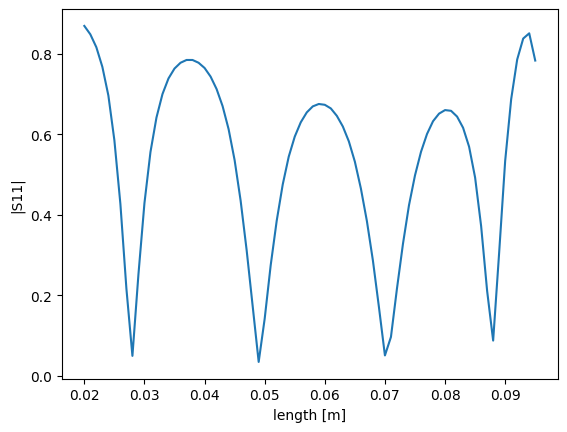

In [94]:
%matplotlib inline
plt.plot(lengths, S11v)
plt.ylabel('|S11|')
plt.xlabel('length [m]')

Text(0.5, 0, 'length [m]')

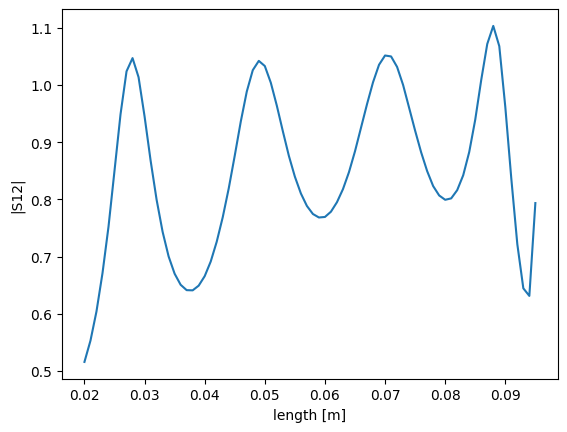

In [95]:
plt.plot(lengths, S12v)
plt.ylabel('|S12|')
plt.xlabel('length [m]')


In [96]:
# try wiring up capacitors of different capacitance 
el = 0.075
freqs = np.array([96])
capnetcompare = build_capnet_given_length(el, freqs, filename='circ_model/S11_cap_81to111MHz.csv', z0=9.3506, round_level=3)
Zcap, C = print_Znorm_and_capacitance(capnetcompare, 96, freqs)
freq = rf.Frequency.from_f(freqs, unit='MHz')
capZ = 1 / (1j * 2 * rf.pi * freq.f * C)
print(capZ)
Z = np.zeros((1,1,1), dtype='complex')
Z[0,0,0] = capZ
C1net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C1')
C2net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C2')
C3net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C3')
C4net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C4')
C5net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C5')
C6net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C6')
C7net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C7')
C8net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C8')
C9net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C9')

# wire them together 
connections2 = [
    [(antnet1, 0), (port_in, 0)],
    [(antnet1, 1), (port_out, 0)],
    [(antnet1, 2), (C1net, 0)],
    [(antnet1, 3), (C2net, 0)],
    [(antnet1, 4), (C3net, 0)],
    [(antnet1, 5), (C4net, 0)],
    [(antnet1, 6), (C5net, 0)],
    [(antnet1, 7), (C6net, 0)],
    [(antnet1, 8), (C7net, 0)],
    [(antnet1, 9), (C8net, 0)],
    [(antnet1, 10), (C9net, 0)],
]

circuit_model2 = rf.Circuit(connections2)
model_network2 = circuit_model2.network

S11 = get_full_TWA_network_S11(model_network2)
S12 = get_full_TWA_network_S12(model_network2)

print(f'|S11|: {S11}')
print(f'|S12|: {S12}')
# short_impedance = 1e-6  # very low impedance for a short circuit
# short_network = rf.Network(frequency=freq, s=rf.complex_2D.zeros(freq.npoints, 2, 2))

# tl_media = rf.DefinedGammaZ0(freq, z0=[9.3506], gamma=1j*freq.w/rf.c)
# print(f'C: {C}')

# C1 = tl_media.capacitor(C, name='C1')
# short = rf.data.wr2p2_short
# short.frequency = freq
# print(short.frequency)
# C1net = rf.connect(C1, 1, short, 0)
# print(C1net)


Zcap:(0.0002841616721200781-65.86654637909331j), z0: [9.3506+0.j], Zcap/z0: [3.03896725e-05-7.04409839j]
C = 25.170045822636283 pF
[0.-65.86654638j]
|S11|: 0.4978885916330844
|S12|: 0.9203080605340032


In [140]:
C1net_direct = capnetcompare
print(f'C1net_direct.z: {C1net_direct.z[0,0,0]}')
print(f'C1net.z: {C1net.z[0,0,0]}')
type(C9net.frequency.f_scaled)


C1net_direct.z: (0.0002841616721200781-65.86654637909331j)
C1net.z: (-4.9264866469359805e-15-65.86654637909332j)


numpy.ndarray

In [143]:
# more debugging with cap netwroks 
freqs = np.array([96])
el = .02
test_comsolcap = build_capnet_given_length(el, freqs, filename='circ_model/S11_cap_81to111MHz.csv', z0=9.3506, round_level=3)
print(test_comsolcap.z)
print(rf.s2z(test_comsolcap.s, z0=9.3506))
print(print_Znorm_and_capacitance(test_comsolcap, 96, freqs, toprint=False))

freq = rf.Frequency.from_f(96, unit='MHz')
Zz = 1e-5 - 25*1j
net1 = rf.Network(frequency=freq, z=Zz, z0=9.3506, name='net1')
print(rf.s2z(net1.s, z0=9.3506))
test_comsolcap.frequency.f_scaled

[[[-0.00521809-308.97598391j]]]
[[[-0.00521809-308.97598391j]]]
((-0.0052180855412382095-308.9759839078358j), 5.365672663526817e-12)
[[[1.e-05-25.j]]]


array([96.])

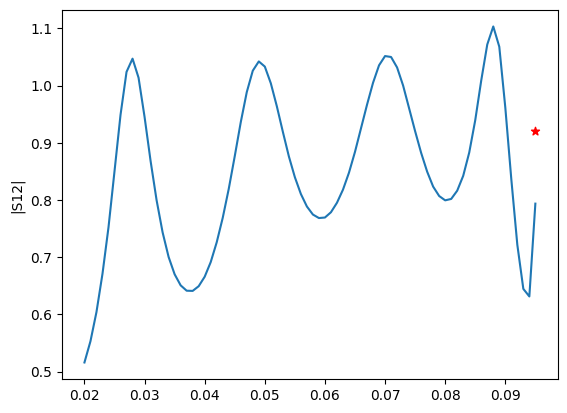

In [99]:
plt.plot(lengths, S12v)
plt.ylabel('|S12|')
plt.scatter(el, S12, marker='*', color='red')

In [100]:
def get_S11_and_S12_given_length_via_caps(el):
    freqs = np.array([96])
    # antenna network 
    ant_filename = 'circ_model/Smat_ant_96.csv'
    ant_z0s = [30, 30] + [9.3506]*9
    antnet1 = build_antnet(freqs, ant_filename, z0=ant_z0s, name='test antenna network')

    capnetcompare = build_capnet_given_length(el, freqs, filename='circ_model/S11_cap_81to111MHz.csv', z0=9.3506, round_level=3)
    Zcap, C = print_Znorm_and_capacitance(capnetcompare, 96, freqs, toprint=False)
    freq = rf.Frequency.from_f(freqs, unit='MHz')
    capZ = 1 / (1j * 2 * rf.pi * freq.f * C)
    Z = np.zeros((1,1,1), dtype='complex')
    Z[0,0,0] = capZ
    C1net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C1')
    C2net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C2')
    C3net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C3')
    C4net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C4')
    C5net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C5')
    C6net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C6')
    C7net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C7')
    C8net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C8')
    C9net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C9')

    portf = rf.Frequency.from_f(freqs, unit='MHz')

    port_in = rf.Circuit.Port(frequency=portf, z0=30, name='input')
    port_out = rf.Circuit.Port(frequency=portf, z0=30, name='output')
    
    # wire them together 
    connections2 = [
        [(antnet1, 0), (port_in, 0)],
        [(antnet1, 1), (port_out, 0)],
        [(antnet1, 2), (C1net, 0)],
        [(antnet1, 3), (C2net, 0)],
        [(antnet1, 4), (C3net, 0)],
        [(antnet1, 5), (C4net, 0)],
        [(antnet1, 6), (C5net, 0)],
        [(antnet1, 7), (C6net, 0)],
        [(antnet1, 8), (C7net, 0)],
        [(antnet1, 9), (C8net, 0)],
        [(antnet1, 10), (C9net, 0)],
    ]

    circuit_model2 = rf.Circuit(connections2)
    model_network2 = circuit_model2.network

    S11 = get_full_TWA_network_S11(model_network2)
    S12 = get_full_TWA_network_S12(model_network2)
    return S11, S12



In [101]:
lengths = np.arange(0.02, 0.096, 0.001)
S11v2 = np.array([])
S12v2 = np.array([])

for i in range(lengths.shape[0]):
    length = lengths[i]
    S11, S12 = get_S11_and_S12_given_length_via_caps(length)
    S11v2 = np.append(S11v2, S11)
    S12v2 = np.append(S12v2, S12)

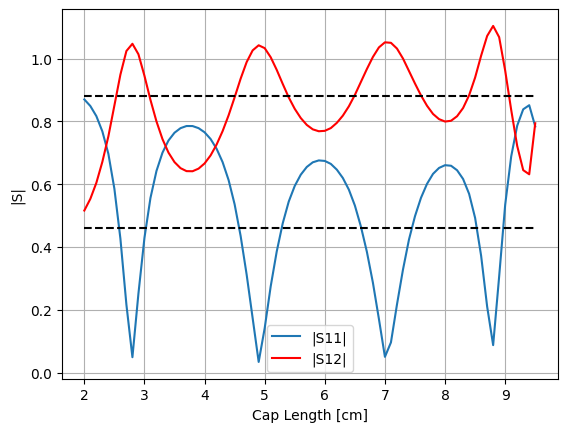

In [126]:
%matplotlib inline
plt.plot(lengths*100, S11v2, label='|S11|')
plt.plot(lengths*100, S12v2, label='|S12|', color='red')
plt.ylabel('|S|')
plt.xlabel('Cap Length [cm]')
plt.grid()
plt.legend()
plt.plot(lengths*100, lengths/lengths*0.46, color='black', linestyle='--')
plt.plot(lengths*100, lengths/lengths*0.88, color='black', linestyle='--')

0.46118045275141484 0.8871639422902624
0.999873627264966
[0.99979547 0.99978749 0.99977607 0.99975954 0.99973464 0.99969712
 0.99963714 0.99954091 0.99937282 0.99906858 0.99850016 0.99730891
 0.99451856 0.98636193 0.95280399 0.67572952 0.603643   0.88885893
 0.93941856 0.95421965 0.95879775 0.95797066 0.95279934 0.94228257
 0.9225989  0.88635836 0.81509082 0.66355794 0.36100123 0.07869379
 0.4534236  0.66380096 0.77088898 0.82638952 0.85736372 0.874324
 0.8825951  0.8845091  0.88051862 0.87105566 0.85502558 0.82979299
 0.79189634 0.73538364 0.64937521 0.5224142  0.34783977 0.12704098
 0.10247997 0.30463905 0.46227823 0.57431644 0.65370311 0.70521171
 0.73956151 0.76175207 0.77374582 0.77764413 0.77429929 0.76313595
 0.74319409]


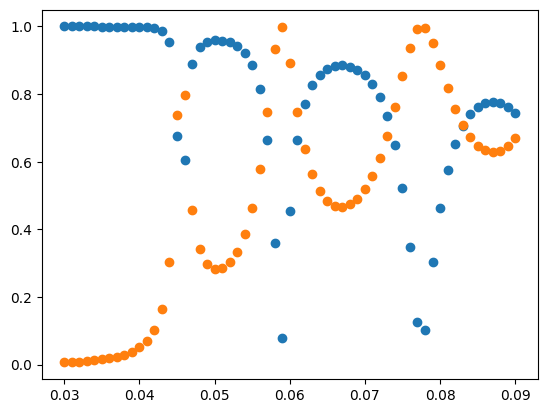

In [144]:
# from comsol model: 
points = np.array([], dtype='complex')
points = np.append(points, [96.000,	0.31012+0.34134*1j,	-0.65654+0.59667*1j])
S11got = np.abs(points[1])
S12got = np.abs(points[2])
print(S11got, S12got)
print(np.sqrt(S11got**2 + S12got**2))

def get_ant_S_11_21(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)
    headers = data[4]
    data = data[5:]
    fmat_string  = []
    for row in data:
        fmat_string.append(row)
    fmat = np.array([[complex(num.replace('i', 'j')) for num in row] for row in fmat_string], dtype=complex)
    lcaps = fmat[:,0]
    S11_mag = np.abs(fmat[:,3])
    S21_mag = np.abs(fmat[:,4])
    return np.real(lcaps), S11_mag, S21_mag

filename2 = 'circ_model/S11_S12_96mhz_lcap_3by0_01_to_9_cm.csv'
lcaps, S11_mag, S21_mag = get_ant_S_11_21(filename2)
print(S11_mag)
plt.scatter(lcaps, S11_mag)
plt.scatter(lcaps, S21_mag)

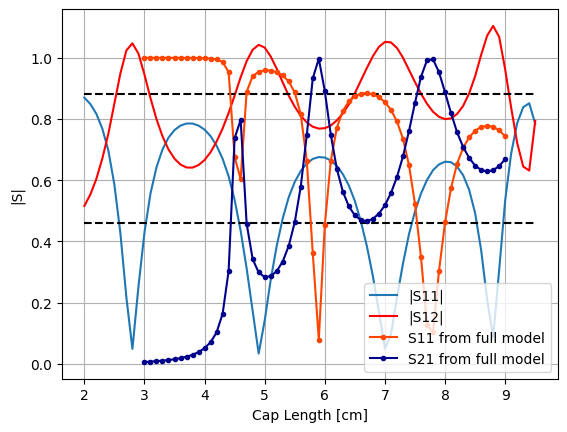

In [150]:
plt.plot(lengths*100, S11v2, label='|S11|')
plt.plot(lengths*100, S12v2, label='|S12|', color='red')
plt.ylabel('|S|')
plt.xlabel('Cap Length [cm]')
plt.grid()

plt.plot(lengths*100, lengths/lengths*0.46, color='black', linestyle='--')
plt.plot(lengths*100, lengths/lengths*0.88, color='black', linestyle='--')

plt.plot(lcaps*100, S11_mag, label='S11 from full model', marker='.', color='orangered')
plt.plot(lcaps*100, S21_mag, color='darkblue', label='S21 from full model', marker='.')
plt.legend()

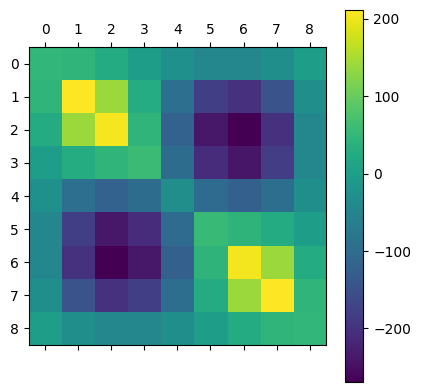

In [103]:
# antenna z matrix 
zant = rf.s2z(antnet1.s[:, 2:, 2:], z0=9.3506)[0]
plt.matshow(np.imag(zant))
plt.colorbar()

In [153]:
# now trying to vary capacitance and plot the solution 
def get_S11_and_S12_given_C_via_caps(C):
    freqs = np.array([96])
    # antenna network 
    ant_filename = 'circ_model/Smat_ant_96.csv'
    ant_z0s = [30, 30] + [9.3506]*9
    antnet1 = build_antnet(freqs, ant_filename, z0=ant_z0s, name='test antenna network')


    freq = rf.Frequency.from_f(freqs, unit='MHz')
    capZ = 1 / (1j * 2 * rf.pi * freq.f * C)
    Z = np.zeros((1,1,1), dtype='complex')
    Z[0,0,0] = capZ
    C1net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C1')
    C2net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C2')
    C3net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C3')
    C4net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C4')
    C5net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C5')
    C6net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C6')
    C7net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C7')
    C8net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C8')
    C9net = rf.Network(frequency=freq, z=Z, z0=9.3506, name='C9')

    portf = rf.Frequency.from_f(freqs, unit='MHz')

    port_in = rf.Circuit.Port(frequency=portf, z0=30, name='input')
    port_out = rf.Circuit.Port(frequency=portf, z0=30, name='output')
    
    # wire them together 
    connections2 = [
        [(antnet1, 0), (port_in, 0)],
        [(antnet1, 1), (port_out, 0)],
        [(antnet1, 2), (C1net, 0)],
        [(antnet1, 3), (C2net, 0)],
        [(antnet1, 4), (C3net, 0)],
        [(antnet1, 5), (C4net, 0)],
        [(antnet1, 6), (C5net, 0)],
        [(antnet1, 7), (C6net, 0)],
        [(antnet1, 8), (C7net, 0)],
        [(antnet1, 9), (C8net, 0)],
        [(antnet1, 10), (C9net, 0)],
    ]

    circuit_model2 = rf.Circuit(connections2)
    model_network2 = circuit_model2.network

    S11 = get_full_TWA_network_S11(model_network2)
    S12 = get_full_TWA_network_S12(model_network2)
    return S11, S12


In [154]:
Cs = np.linspace(5.365672663526817e-12, 5.3274401926861996e-11, 100) # el=0.02 C = 4.939304803877667e-11, el = 0.095, C = 8.066132824996895e-11 OLD, non-de-embded
# NEW RANGE: el = 0.02, C =5.365672663526817e-12,,, el = 0.095, C = 3.3274401926861996e-11
#Cs = np.linspace(1.9e-13, 80.06e-12, 1000) # el=0.02 C = 4.939304803877667e-11, el = 0.095, C = 8.066132824996895e-11
S11v3 = np.array([])
S12v3 = np.array([])

for i in range(Cs.shape[0]):
    Ci = Cs[i]
    S11, S12 = get_S11_and_S12_given_C_via_caps(Ci)
    S11v3 = np.append(S11v3, S11)
    S12v3 = np.append(S12v3, S12)

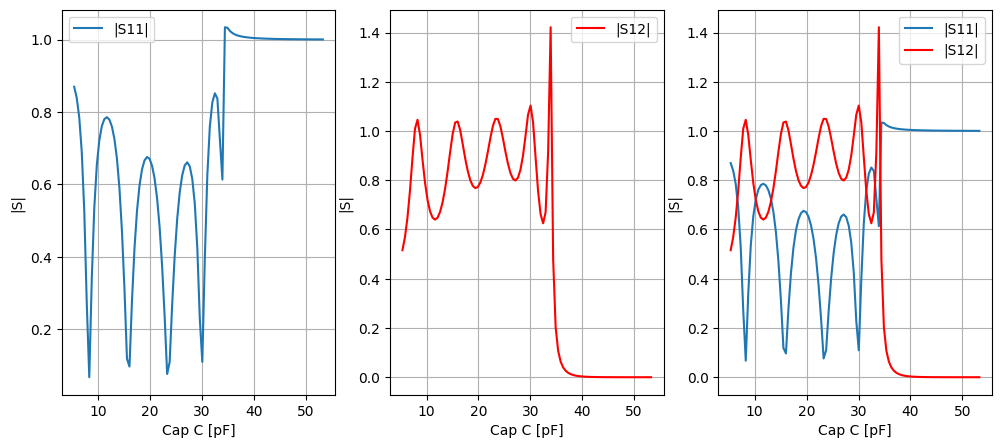

In [155]:
%matplotlib inline
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].plot(Cs*1e12, S11v3, label='|S11|')
axs[1].plot(Cs*1e12, S12v3, label='|S12|', color='red')
axs[0].set_ylabel('|S|')
axs[0].set_xlabel('Cap C [pF]')
axs[0].grid()
axs[0].legend()
axs[1].set_ylabel('|S|')
axs[1].set_xlabel('Cap C [pF]')
axs[1].grid()
axs[1].legend()

axs[2].plot(Cs*1e12, S11v3, label='|S11|')
axs[2].plot(Cs*1e12, S12v3, label='|S12|', color='red')
axs[2].set_ylabel('|S|')
axs[2].set_xlabel('Cap C [pF]')
axs[2].grid()
axs[2].legend()

In [115]:
l = 0.02 #+ 11e-2
hh = 0.5e-2
Canylitic = myTWA.epsi0*(2*1e-2+2*8.5e-2)*l/hh
print(Canylitic)
# coaxial version
pout = 2*9.5e-2 + 2*2e-2
pin = 2*8.5e-2 + 2*1e-2
Ccoax = 2*np.pi*myTWA.epsi0*l/np.log(pout/pin)
print(Ccoax)

6.72904e-12
5.8235852261785634e-12


In [23]:
# filename = 'circ_model/S11_cap_81to111MHz.csv'
# freqs = np.arange(81,111+1,1)
# z0 = [9.3506]
# capnet1 = build_capnet_given_length(length=0.04, freqs=freqs, filename=filename, z0=z0, round_level=3)
# print(f'capnet1.z0: {capnet1.z0.shape}')
# print_Znorm_and_capacitance(capnet1, 96, freqs)

In [24]:
# # practice making a network for the cap 
# ffound, lcapfound, S11, S11db, Z0_port, VSWR = get_cap_S_given_f_and_lcap(filename='circ_model/S11_cap_course.csv',
#                                   f=96, lcap=0.02)
# print(f'ffound: {ffound}, lcapfound: {lcapfound}, S11: {S11}')

# freqs = np.arange(81,111+1,1)
# length = 0.02
# S11_array = np.zeros((freqs.shape[0], 1, 1), dtype='complex')
# for i in range(freqs.shape[0]):
#     f = freqs[i]
#     ffound, lcapfound, S11, S11db, Z0_port, VSWR = get_cap_S_given_f_and_lcap(filename='circ_model/S11_cap_81to111MHz.csv',
#                                   f=f, lcap=length)
#     S11_array[i, 0, 0] = S11


# # create the network object 
# capnet = rf.Network()
# capnet.frequency = rf.Frequency.from_f(freqs, unit='MHz')
# capnet.s = S11_array
# capnet.name = 'cap1'
# capnet.z0 = 9.3506
# Zcap = rf.s2z(capnet.s)[0]
# print(f'Zcap:{Zcap/capnet.z0[0]}')
# C = (-np.imag(Zcap)*2*np.pi*81e6)**-1
# print(f'C = {C*1e12} pF')
# print(capnet.s.shape)



In [25]:
# print(capnet.s.shape)
# print(capnet.frequency)
# capnet.plot_s_smith(draw_labels=True, color='red')